# Predicting heart disease using machine learning

we're going to take the following approch:
1. problem definition
2. Data
3. Evaluation
4. Feature 
5. Modelling
6. Experimentation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, f1_score, plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [14]:
heart_disease = pd.read_csv('./data/heart-disease.csv')

In [15]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [17]:
heart_disease.shape, heart_disease.dtypes, heart_disease.isna().sum()

((303, 14),
 age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg       int64
 thalach       int64
 exang         int64
 oldpeak     float64
 slope         int64
 ca            int64
 thal          int64
 target        int64
 dtype: object,
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64)

In [18]:
heart_disease['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

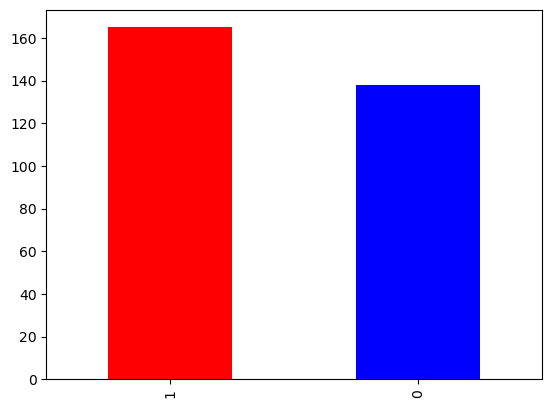

In [20]:
heart_disease['target'].value_counts().plot.bar(color=['red', 'blue']);

In [21]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
# target to sex
pd.crosstab(heart_disease['target'],heart_disease['sex'])

sex,0,1
target,,
0,24,114
1,72,93


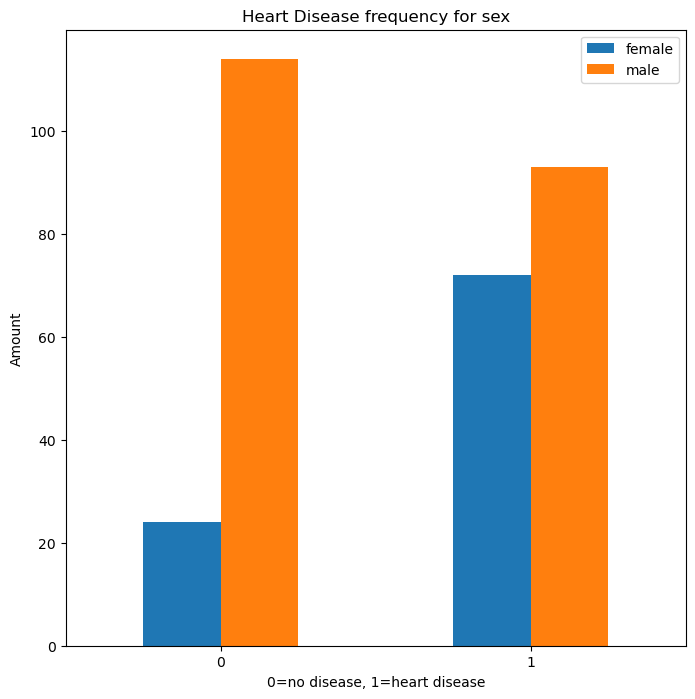

In [24]:
pd.crosstab(heart_disease['target'],heart_disease['sex']).plot(kind='bar',figsize=(8,8) )
plt.title('Heart Disease frequency for sex')
plt.xlabel('0=no disease, 1=heart disease')
plt.ylabel('Amount')
plt.legend(['female', 'male'])
plt.xticks(rotation=0);

In [25]:
heart_disease.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

<Axes: >

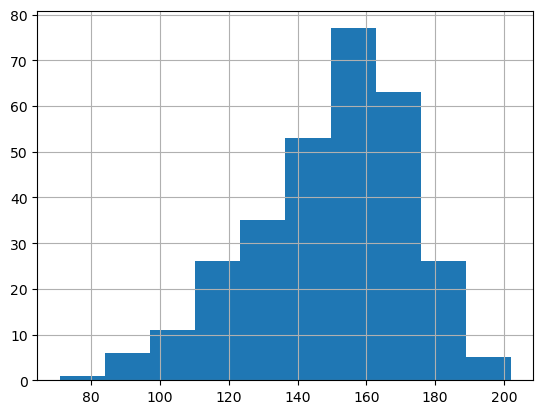

In [26]:
heart_disease.thalach.hist()

<Axes: >

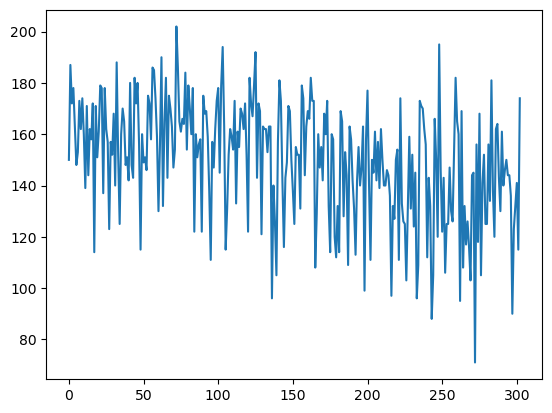

In [27]:
heart_disease.thalach.plot()

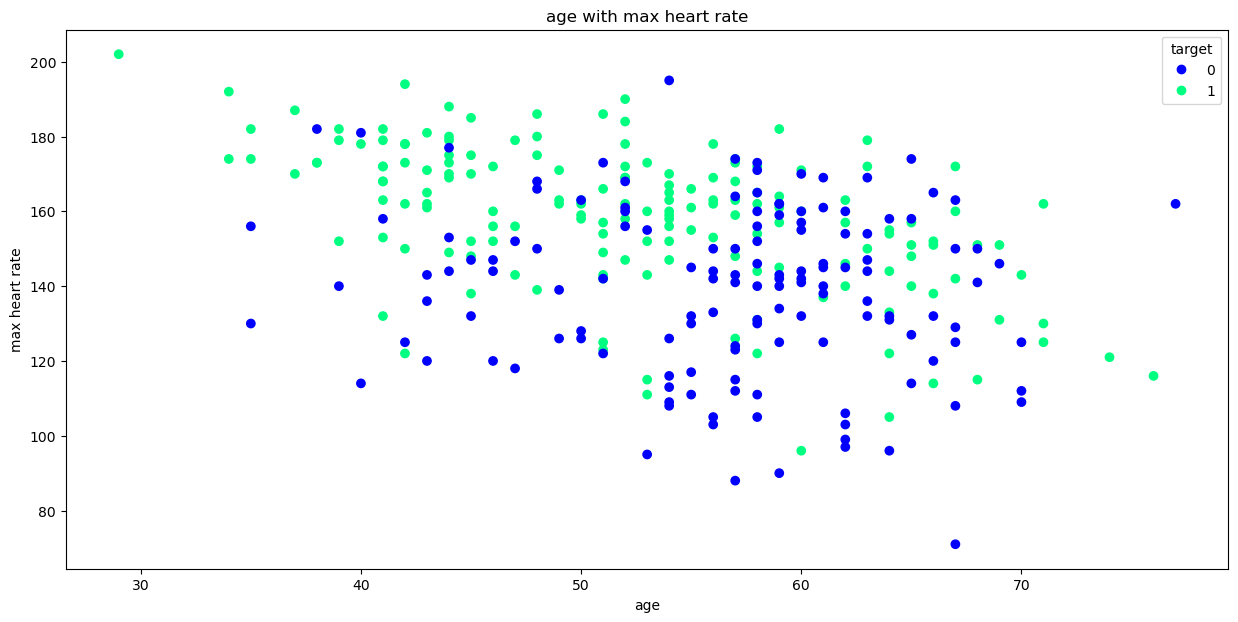

In [28]:
plt.figure(figsize=(15,7))
d = plt.scatter(heart_disease.age,heart_disease.thalach, c=heart_disease.target, cmap='winter')
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.title('age with max heart rate')
plt.legend(*d.legend_elements(),title='target');

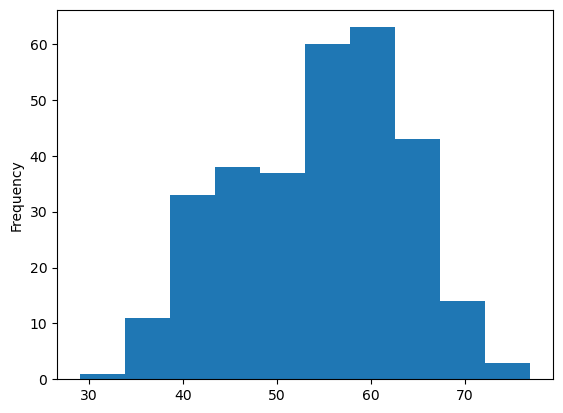

In [29]:
heart_disease.age.plot.hist();

In [30]:
pd.crosstab(heart_disease.target, heart_disease['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


Text(0.5, 1.0, 'cp with target')

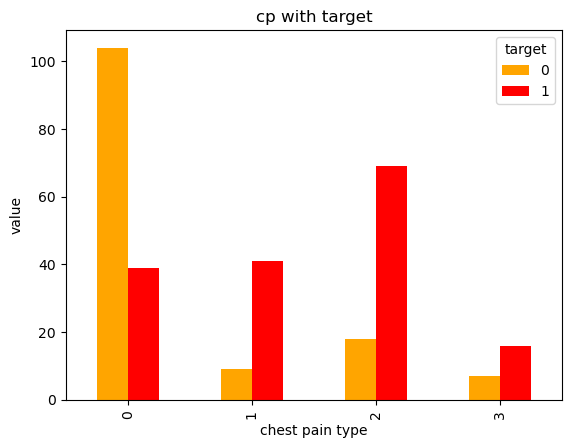

In [31]:
pd.crosstab(heart_disease['cp'],heart_disease.target).plot(kind='bar', color=[ 'orange','red']);
plt.xlabel('chest pain type')
plt.ylabel('value')
plt.title('cp with target')

In [32]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


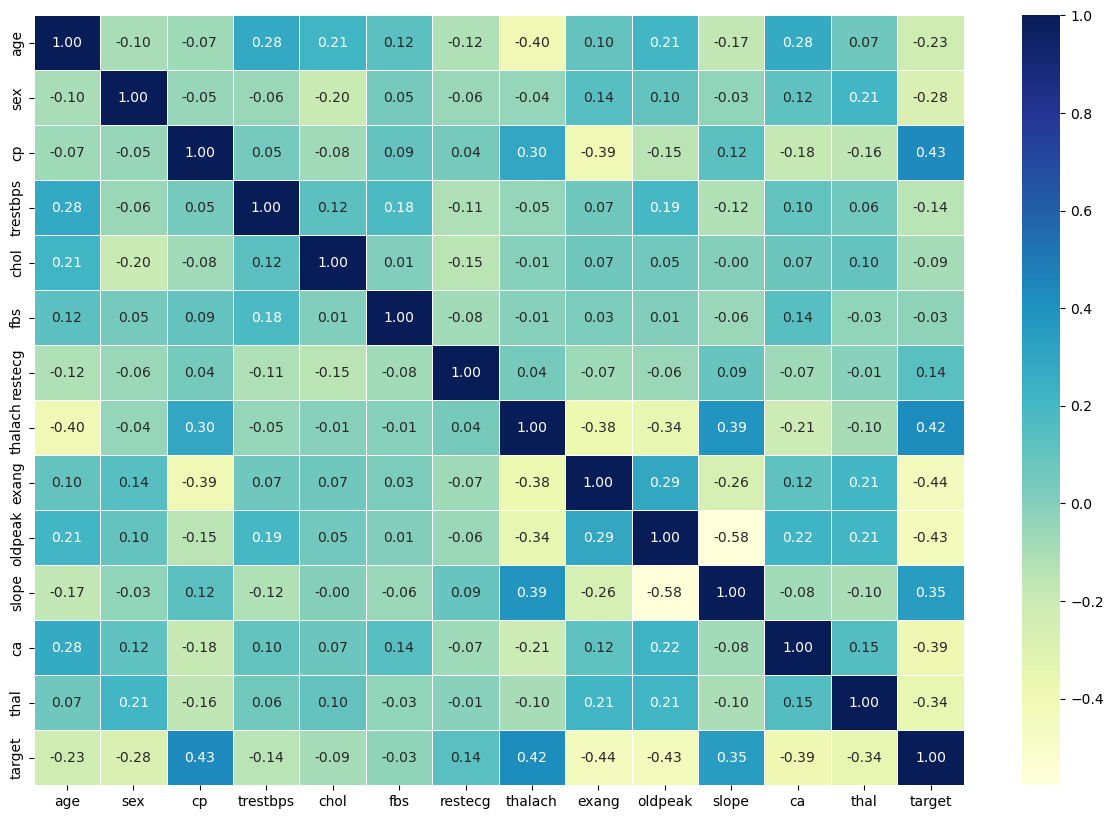

In [33]:
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True,linewidths=0.5, fmt='.2f', cmap='YlGnBu')

In [34]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [36]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score (models, X_train,X_test, y_train, y_test):
    np.random.seed(42)
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [37]:
model_score = fit_and_score(models, X_train, X_test, y_train, y_test)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

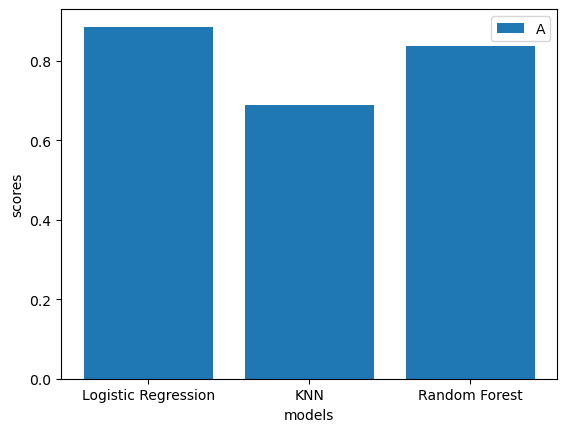

In [39]:
plt.bar(model_score.keys(), model_score.values())
plt.xlabel('models')
plt.ylabel('scores')
plt.legend(labels='Acc');

Let's look at the following

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* precision
* recall
* accuarcy
* f1 score
* ROC curve
* AUC

In [40]:
np.random.seed(42)
training_score = []
test_score = []

neighbours = range(1,21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i, weights='uniform', algorithm='kd_tree', leaf_size=25 )
    knn.fit(X_train, y_train)
    training_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

training_score, test_score

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

In [41]:
pd.DataFrame({
    'train_score': training_score,
    'test_score': test_score
})

,train_score,test_score
0,1.000000,0.622951
1,0.809917,0.639344
2,0.772727,0.655738
3,0.743802,0.672131
4,0.760331,0.688525
5,0.752066,0.721311
6,0.743802,0.704918
7,0.723140,0.688525
8,0.719008,0.688525
9,0.694215,0.704918


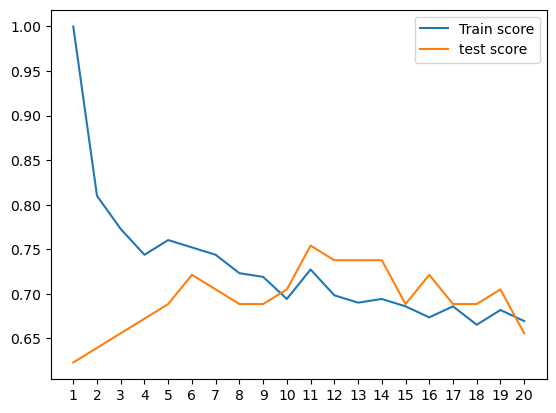

In [42]:
plt.plot(neighbours, training_score, label='Train score')
plt.xticks(range(0,21,1))
plt.plot(neighbours, test_score, label='test score');
plt.legend();

## RandomizedSearchCV

### Logistic regression

In [43]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver":  ['liblinear'],
    'max_iter': [100,200,500,1000]
}

rf_grid = {
    'n_estimators': np.arange(10,2000, 50),
    'max_depth': [None,3,5,7],
    'min_samples_split': np.arange(2,200,2),
    'min_samples_leaf': np.arange(1,220,2),
    'max_features': ['auto', 'sqrt'],
    'max_leaf_nodes': np.arange(0,1200,10)
}

In [44]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 200, 500, 1000],
                                        'solver': ['liblinear']},
                   verbose=True)

In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 200, 'C': 0.23357214690901212}

In [46]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=10,n_iter=100, verbose=True, n_jobs=4)
rs_rf.fit(X_train, y_train)

In [48]:
rs_rf.best_params_

{'n_estimators': 1960,
 'min_samples_split': 2,
 'min_samples_leaf': 27,
 'max_leaf_nodes': 1000,
 'max_features': 'sqrt',
 'max_depth': 3}

In [49]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### GridSearchCV

In [50]:
log_reg_grid = {
    "C": np.logspace(-6, 6, 30),
    "solver":  ['liblinear']
}

log_reg_grid = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid, cv=5,verbose=True, n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-06, 2.59294380e-06, 6.72335754e-06, 1.74332882e-05,
       4.52035366e-05, 1.17210230e-04, 3.03919538e-04, 7.88046282e-04,
       2.04335972e-03, 5.29831691e-03, 1.37382380e-02, 3.56224789e-02,
       9.23670857e-02, 2.39502662e-01, 6.21016942e-01, 1.61026203e+00,
       4.17531894e+00, 1.08263673e+01, 2.80721620e+01, 7.27895384e+01,
       1.88739182e+02, 4.89390092e+02, 1.26896100e+03, 3.29034456e+03,
       8.53167852e+03, 2.21221629e+04, 5.73615251e+04, 1.48735211e+05,
       3.85662042e+05, 1.00000000e+06]),
                         'solver': ['liblinear']},
             verbose=True)

In [51]:
log_reg_grid.best_params_

{'C': 0.2395026619987486, 'solver': 'liblinear'}

In [52]:
log_reg_grid.score(X_test, y_test)

0.8852459016393442

In [53]:
y_preds = log_reg_grid.predict(X_test)
y_preds_proba = log_reg_grid.predict_proba(X_test)

In [54]:
plot_roc_curve(log_reg_grid, X_test, y_test);

NameError: name 'plot_roc_curve' is not defined

In [55]:
cm = confusion_matrix(y_test, y_preds)

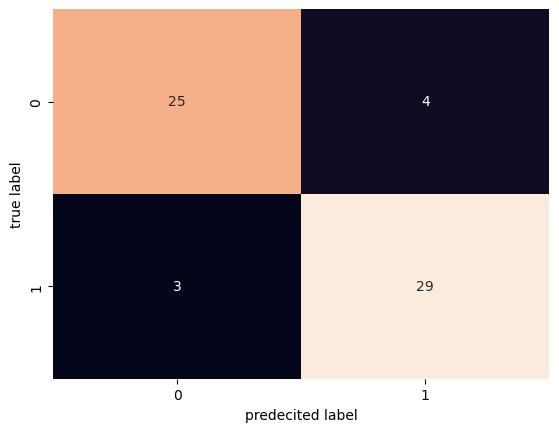

In [56]:
fig , ax = plt.subplots()
ax = sns.heatmap(cm, annot=True, cbar=False)
ax.set(xlabel='predecited label')
ax.set(ylabel='true label');

In [64]:
clfrep = classification_report(y_test, y_preds,output_dict=True)
pd.DataFrame(clfrep)

,0,1,accuracy,macro avg,weighted avg
precision,0.892857,0.878788,0.885246,0.885823,0.885477
recall,0.862069,0.906250,0.885246,0.884159,0.885246
f1-score,0.877193,0.892308,0.885246,0.884750,0.885122
support,29.000000,32.000000,0.885246,61.000000,61.000000


In [58]:
clf = LogisticRegression(C=0.2395026619987486, solver='liblinear')
cross_val_score(clf, X_train, y_train)

array([0.83673469, 0.85714286, 0.8125    , 0.85416667, 0.8125    ])

In [59]:
cv_acc = cross_val_score(clf, X_train, y_train, scoring='accuracy')

In [60]:
cv_precision = cross_val_score(clf, X_train, y_train, scoring='precision')

In [61]:
cv_recall = cross_val_score(clf, X_train, y_train, scoring='recall')

In [62]:
cv_f1 = cross_val_score(clf, X_train, y_train, scoring='f1')

In [65]:
cv_metrices = pd.DataFrame({
    'Accuaracy': cv_acc,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1': cv_f1
})

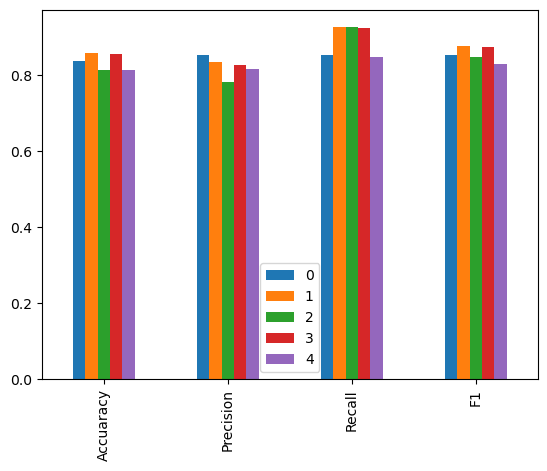

In [66]:
cv_metrices.T.plot.bar();

### Feature importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

* Finding feature importance is diffrent for every model

In [67]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
clf.fit(X_train, y_train)


LogisticRegression(C=0.2395026619987486, solver='liblinear')

In [69]:
log_reg_grid.best_params_

{'C': 0.2395026619987486, 'solver': 'liblinear'}

In [70]:
clf = LogisticRegression(C = 0.2395026619987486,solver = 'liblinear')
clf.fit(X_train, y_train);

In [71]:
d = pd.Series(clf.coef_[0])

<Axes: >

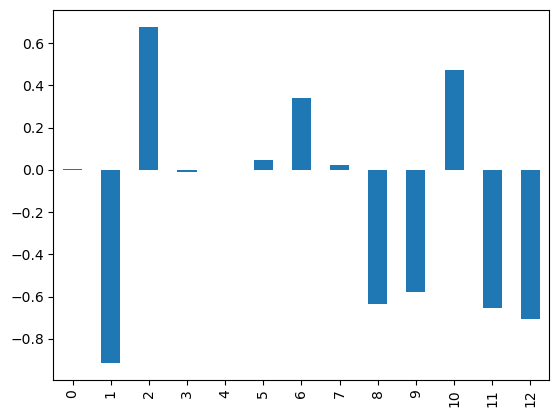

In [72]:
d.plot.bar(d.mean(), d)

In [73]:
feature_dict = dict(zip(heart_disease.columns, list(clf.coef_[0])))

In [74]:
feature_dict

{'age': 0.0038102230235859905,
 'sex': -0.9127536491397261,
 'cp': 0.6778786630700615,
 'trestbps': -0.011622920206974974,
 'chol': -0.001710133032170534,
 'fbs': 0.04910549775160913,
 'restecg': 0.3393473649999907,
 'thalach': 0.024761913639619965,
 'exang': -0.636250539122055,
 'oldpeak': -0.5771725845674397,
 'slope': 0.4752641927841829,
 'ca': -0.6545110963428954,
 'thal': -0.7043232306545771}

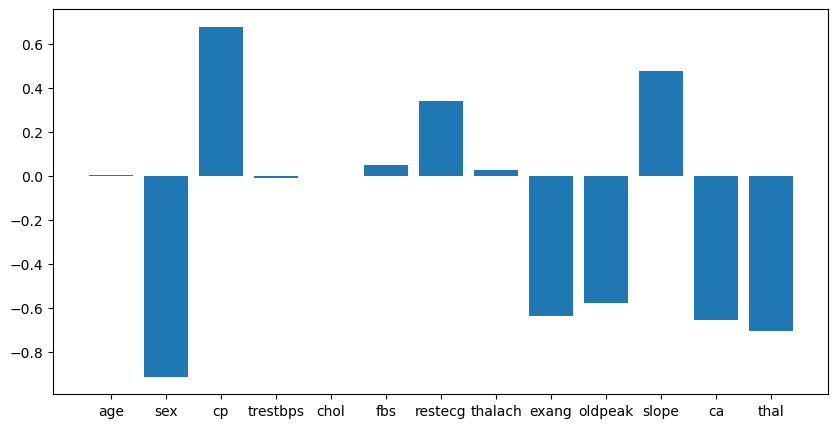

In [75]:
plt.figure(figsize=(10,5))
plt.bar(feature_dict.keys(), feature_dict.values());